# [Парсинг внешних данных](https://stepik.org/lesson/866758/)

Эта тетрадка поможет разобраться вам в основных моментах парсинга внешних данных на python, познакомиться с полезными функциями и трюками. Вместе с вами мы посмотрим на возможности основных библиотек и закрепим на примерах.

### Оглавление ноутбука
<img src="../images/bs_requests.png" align="right" width="528" height="528" />
<br>

<p><font size="3" face="Arial" font-size="large">
<ul type="square"><li><a href="#1">Анализ URL запроса</a><ul><li><a href="#2">Типы запросов и ответов</a></li></ul></li><li><a href="#3">Парсинг HTML страничек</a><ul><li><a href="#5">BeautifulSoup</a></li><li><a href="#6">Парсим погоду</a></li><li><a href="#7">Selenium</a></li></ul></li>

##  Анализ URL запроса

<p id="1"></p>
Рассмотрим для начала структуру `URL` адреса, это важно! `URL` адрес имеет определенную структуру, которая включает:

- метод доступа к ресурсу, который также называется __сетевым протоколом__;
- __авторизацию доступа__;
- __хосты__ – DNS адрес, который указан как IP адрес;
- __порт__ – еще одна обязательная деталь, которая включается в сочетании с IP адресом;
- __трек__ – определяет информацию о методе получения доступа;
- __параметр__ – внутренние данные ресурса о файле.


<img src="https://sun9-65.userapi.com/impg/VNKZOAYMIumG8qJcm8R1GBUG5iRj1Y1HJ0OeqQ/hEk7cu3dhzI.jpg?size=2143x1126&quality=96&sign=5c59d6c509304ba62f218e21254ad525&type=album"></img>

In [1]:
from urllib.parse import urlparse, parse_qsl, parse_qs

url = "http://www.example.com:80/path/to/myfile.html?key1=value1&key2=value2#SomewhereInTheDocument"
url_parsed = urlparse(url)
url_parsed

ParseResult(scheme='http', netloc='www.example.com:80', path='/path/to/myfile.html', params='', query='key1=value1&key2=value2', fragment='SomewhereInTheDocument')

In [2]:
url_parsed.path

'/path/to/myfile.html'

In [3]:
dict(parse_qsl(url_parsed.query))

{'key1': 'value1', 'key2': 'value2'}

### Типы запросов и ответов

<p id="2"></p>
C ссылками разобрались. Что же представляет из себя один из основных протоколов интернета? Тип HTTP-запроса (также называемый HTTP-метод) указывает серверу на то, какое действие мы хотим произвести с ресурсом. Изначально (в начале 90-х) предполагалось, что клиент может хотеть от ресурса только одно — получить его, однако сейчас по протоколу HTTP можно создавать посты, редактировать профиль, удалять сообщения и многое другое. И эти действия сложно объединить термином «получение».

Для разграничения действий с ресурсами на уровне HTTP-методов и были придуманы следующие варианты:  <img src="https://sun9-23.userapi.com/impg/ieMiTgQNwhi-RnoMCI24CzNn0fC7dMi8HO7QSA/CBgxOLofBqc.jpg?size=509x252&quality=96&sign=08a9cc2b888fd21ebdb9852fb3e30868&type=album" align="right" padding=100px></img>
<br> 
- `GET` — получение ресурса 
- `POST` — создание ресурса
- `PUT` — обновление ресурса
- `DELETE` — удаление ресурса 

## Библиотека requests

In [4]:
import requests

<!-- Попробуем отправить и записать сообщение на сервисе [transfer.sh](https://www.transfer.sh). Сервис позволяет пользователям хранить, синхронизировать и обмениваться файлами в Интернете с другими пользователями прямо из терминала.
 -->

<!-- # r_put = requests.put('https://transfer.sh/arg.txt', data='Bonjour le monde!')
# r_put -->

<!-- r_put.ok, r_put.status_code -->

<!-- print(r_put.text) -->

Рассмотрим метод создания запроса `GET`. Также пытаемся отправить запрос на поиск репозитория. Укажем `URL` интересующего нас ресурса и дополнительные параметры в виде словаря.

In [39]:
import requests

response = requests.get(
    "https://api.github.com/search/repositories",
    params={"q": "Competitive_Data_Science"},
    headers={"Accept": "application/vnd.github.text-match+json"},
)

# Просматриваем новый список текстовых совпадений, который предоставляет информацию
# о вашем поисковом запросе в результатах
json_response = response.json()

first_repository = json_response["items"][0]

print(first_repository["text_matches"][0]["matches"])

[{'text': 'Data Science', 'indices': [28, 40]}]


Заголовок Accept сообщает серверу, какие типы контента может обрабатывать ваше приложение.
В этом случае, поскольку вы ожидаете, что соответствующие условия поиска будут выделены, вы используете значение заголовка application/vnd.github.text-match+json, который представляет собой собственный заголовок GitHub Accept, где контент представляет собой специальный JSON. формат.

In [40]:
response.ok

True

<!-- # page = requests.post('https://controlc.com/index.php?act=submit', data={
#     'subdomain': '',
#     'antispam': 1,
#     'website': '',
#     'paste_title': 'Заметка',
#     'input_text': 'Привет!',
#     'timestamp': 'ba68753935524ba7096650590c86633b',
#     'paste_password': '',
#     'code': 0,
# }, headers={'accept-encoding': 'identity', 'referer': 'https://controlc.com/'})
# page -->

<!-- page.ok, page.status_codea -->

<!-- # print(page.text) -->

## Парсинг HTML страничек

<p id="3"></p>
Для понимания парсинга нужно знать структуру HTML. Как театр начинается с вешалки, так и любой HTML-документ начинается с базовой структуры. Она включает в себя теги, которые есть в любом HTML-файле. Эти теги и служебная информация нужны браузеру для корректного отображения информации.


<img src="https://dev-gang.ru/static/storage/319901168311547457028755251266243086714.gif"></img>

## Структура страницы и тега

<div class="alert alert-info">
    
* Тег `<html></html>` является основой основ. Именно внутри него располагается вся информация. Благодаря этому тегу браузер понимает, где начинается контент, который необходимо обработать как HTML. 
* Тег `<head></head>` служит для хранения служебной информации. Здесь возможны самые разные сочетания тегов, которые подсказывают браузеру название страницы, описание, ключевые слова и так далее. Такая информация называется метаинформацией.
* После тега `<head>` в документе указывается парный тег `<body></body>`, который является «телом» всей страницы. Именно здесь размещается вся информация, которая будет выведена на странице.  
</div>
<img  align="right" width='500px' src="../images/html_tags.png"></img>


Внутри `<body></body>` находится вся структура документа состоящая из тегов, атрибутов и материалов. Рассмотрим единичную структуру - тег: 

<br>Весь текст, заключённый между начальным и конечным тегом, включая и сами эти теги, называется элементом. Сам же текст между тегами — содержанием элемента. Содержание элемента может включать в себя любой текст, в том числе и другие элементы. У тега могут быть свойства, называемые атрибутами, дающие дополнительные возможности форматирования текста. Они записываются в виде сочетания: имя атрибута-значения, причём текстовые значения заключаются в кавычки.

<p id="4"></p>

Так как html (и xml) имеют древовидную структуру, то до любого элемента всегда существет единственный путь, `XPath`.

In [ ]:
!pip install cssselect -q
!pip install lxml -q

In [35]:
from lxml import etree, html as lhtml

## Поиск по html и lxml

Попробуем поиграться со страницей фильма "Стражи Галактики". Допустим, у нас соревнование по предсказанию жанра фильма и было принято решение о парсинге дополнительных данных. Приступим!

In [36]:
tree = lhtml.fromstring(open('../data/parsing_data/689066_2.html', 'r', encoding='utf-8').read())

С помощью `XPath` узнаем информацию о фильме. Сначала указывается интересующий нас тег, допустим `//div`, а затем его атрибут. Настоятельно рекомендуем на этих пунктах открыть исходный код странички и самостоятельно убедиться что откуда берется. Это не сложно :)

In [42]:
# //*[@id="__next"]/div/div[2]/div[1]/div[2]/div/div[3]/div/div/div[1]/div[2]/div/div[1]/span[1]/span

In [41]:
film_info = {
    'title': tree.xpath('//h1[@itemprop="name"]/span/text()')[0],
    'title-original': tree.xpath('//span[starts-with(@class, "styles_originalTitle__")]')[0].text,
    'rating': float(tree.cssselect('a.film-rating-value')[0].text),   # поддержка CSS-селекторов
    'desription': '\n'.join(tree.xpath('//div[starts-with(@class, "styles_synopsisSection")]//text()'))
}

film_info

{'title': 'Стражи Галактики',
 'title-original': 'Guardians of the Galaxy',
 'rating': 7.763,
 'desription': 'Отважному путешественнику Питеру Квиллу попадает в руки таинственный артефакт, принадлежащий могущественному и безжалостному злодею Ронану, строящему коварные планы по захвату Вселенной. Питер оказывается в центре межгалактической охоты, где жертва — он сам.\nЕдинственный способ спасти свою жизнь — объединиться с четверкой нелюдимых изгоев: воинственным енотом по кличке Ракета, человекоподобным деревом Грутом, смертельно опасной Гаморой и одержимым жаждой мести Драксом, также известным как Разрушитель. Когда Квилл понимает, какой силой обладает украденный артефакт и какую опасность он представляет для вселенной, одиночка пойдет на все, чтобы сплотить случайных союзников для решающей битвы за судьбу галактики.'}

Далее найдем ссылку на просмотр. Ссылочки практически всегда находятся в тегах `<a href="your_link"></a>`.

In [38]:
watch = tree.xpath('//a[contains(@class, "kinopoisk-watch-online-button")]/attribute::href')
film_info['watch'] = watch
film_info

{'title': 'Стражи Галактики',
 'title-original': 'Guardians of the Galaxy',
 'rating': 7.763,
 'desription': 'Отважному путешественнику Питеру Квиллу попадает в руки таинственный артефакт, принадлежащий могущественному и безжалостному злодею Ронану, строящему коварные планы по захвату Вселенной. Питер оказывается в центре межгалактической охоты, где жертва — он сам.\nЕдинственный способ спасти свою жизнь — объединиться с четверкой нелюдимых изгоев: воинственным енотом по кличке Ракета, человекоподобным деревом Грутом, смертельно опасной Гаморой и одержимым жаждой мести Драксом, также известным как Разрушитель. Когда Квилл понимает, какой силой обладает украденный артефакт и какую опасность он представляет для вселенной, одиночка пойдет на все, чтобы сплотить случайных союзников для решающей битвы за судьбу галактики.',
 'watch': ['https://hd.kinopoisk.ru/film/4a297ba39cb704fa9a81855f76ab1d73?from=button_online&watch=']}

Найдем картинку аналогичным образом. Тег `<img>`.

In [43]:
image = tree.xpath('//img[contains(@class, "film-poster")]//attribute::srcset')
image

['//avatars.mds.yandex.net/get-kinopoisk-image/1773646/2e6ab20b-7cf1-49e7-b465-bd5a71c13fa3/300x450 1x, //avatars.mds.yandex.net/get-kinopoisk-image/1773646/2e6ab20b-7cf1-49e7-b465-bd5a71c13fa3/600x900 2x']

## Библиотека BeautifulSoup

<p id="5"></p>
С базовыми понятиями разобрались, перейдем к обширной библиотеке <a href = "https://www.crummy.com/software/BeautifulSoup/bs4/doc/">Beautifulsoup</a>. Здесь есть множество полезных алгоритмов, упрощающих вашу работу, оптимизирующих поиск множества информации и т.д. Давайте попробуем достать ту же информацию, что и в предыдущем пункте, только с помощью `BeautifulSoup`. Напоминаем, что в ходе этой практики не лишним будет открыть исходный код странички и самостоятельно убедиться что откуда берется, это очень поможет быстро разобраться.

<img src="https://sun9-58.userapi.com/impg/o_qPHMIWsPUG9VLR3vbjjs6fap-iX89MUHkdWw/oOMz3ZM20QY.jpg?size=751x335&quality=96&sign=5358d071a6a30677ff578a72c2a4fc2e&type=album"></img>

In [44]:
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm

In [47]:
soup = BeautifulSoup(open('../data/parsing_data/689066_2.html', 'rb').read(), 'lxml')

In [48]:
from operator import attrgetter, itemgetter

Берем основную информацию со странички. Запустив сессию `BeautifulSoup`, найдем теги, здесь это можно гораздо проще и приятнее для глаз - `.find("tag", attribute="value")`. Для того, чтобы найти все встречающиеся варианты, используем `.find_all("tag")`

In [49]:
desc = soup.find('div', itemprop='description')
desc = soup.find('div', class_=lambda s: s and s.startswith("styles_synopsisSection")).find_all('p')

film_info = {
    'title': soup.find('h1', itemprop='name').find('span').text,
    'title-original': soup.find('span', class_=lambda s: s and s.startswith('styles_originalTitle__')).text,
    'rating': float(soup.find('a', {'class': 'film-rating-value'}).text), 
    'description': '\n'.join(map(attrgetter('text'), desc))
}
film_info

{'title': 'Стражи Галактики',
 'title-original': 'Guardians of the Galaxy',
 'rating': 7.763,
 'description': 'Отважному путешественнику Питеру Квиллу попадает в руки таинственный артефакт, принадлежащий могущественному и безжалостному злодею Ронану, строящему коварные планы по захвату Вселенной. Питер оказывается в центре межгалактической охоты, где жертва — он сам.\nЕдинственный способ спасти свою жизнь — объединиться с четверкой нелюдимых изгоев: воинственным енотом по кличке Ракета, человекоподобным деревом Грутом, смертельно опасной Гаморой и одержимым жаждой мести Драксом, также известным как Разрушитель. Когда Квилл понимает, какой силой обладает украденный артефакт и какую опасность он представляет для вселенной, одиночка пойдет на все, чтобы сплотить случайных союзников для решающей битвы за судьбу галактики.'}

In [52]:
soup.find('a', {'class': 'film-rating-value'}) # text

<a class="film-rating-value styles_rootPositive__ac3xv styles_rootLink__1CSPc" href="/film/689066/votes/">7.763</a>

In [53]:
header = soup.find('h3', class_="film-page-section-title")
table = header.next_sibling
rows = table.find_all('div', recursive=False)

len(rows)

23

In [54]:
data = []

for row in rows:
    cols = map(lambda x: x.text, row.find_all('div'))
    data.append(cols)

data = pd.DataFrame(data)
data.head()

,0,1,2
0,Год производства,2014,None
1,Страна,США,None
2,Жанр,"фантастика, боевик, приключения, комедияслова","фантастика, боевик, приключения, комедия"
3,Слоган,"«Мстители спасают лишь Землю бренную, а эти ре...","«Мстители спасают лишь Землю бренную, а эти ре..."
4,Режиссер,Джеймс Ганн,None


Найдем картинки. Как было сказано выше, в данном случае использовать удобнее `.find_all("tag")`.

In [55]:
soup = BeautifulSoup(open('../data/parsing_data/689066_stills_2.html', 'rb').read(), 'html.parser')
list(map(lambda s: s.attrs['src'], soup.find('table', class_='fotos').find_all("img")))[:10]

['https://st.kp.yandex.net/images/kadr/sm_2802088.jpg',
 'https://st.kp.yandex.net/images/kadr/sm_2802087.jpg',
 'https://st.kp.yandex.net/images/kadr/sm_2802086.jpg',
 'https://st.kp.yandex.net/images/kadr/sm_2802085.jpg',
 'https://st.kp.yandex.net/images/kadr/sm_2802084.jpg',
 'https://st.kp.yandex.net/images/kadr/sm_2802083.jpg',
 'https://st.kp.yandex.net/images/kadr/sm_2802082.jpg',
 'https://st.kp.yandex.net/images/kadr/sm_2802081.jpg',
 'https://st.kp.yandex.net/images/kadr/sm_2751304.jpg',
 'https://st.kp.yandex.net/images/kadr/sm_2485201.jpg']

## Парсим погоду (когда лень смотреть в окно)

<p id="6"></p>
Периодически в соревнованиях, в которых есть информация о географическом расположении чего-то, может быть полезно спарсить дополнительную информацию о погоде. Давай сделаем это!

In [ ]:
url = 'http://weatherarchive.ru/Temperature/Moscow/{month}-{year}'
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']

years = [2020, 2021, 2022]

In [ ]:
def parse_table(table):
    res = {'temp': [],
           'wet': [],
           'p': [],
           'wind': []}
    
    tags = table.findAll('td')
    k = 0
    for tag in tags:
        if tag.find('a') is not None:
            continue
            
        if k == 0:
            k += 1
            res['temp'].append(float(tag.text.replace('°C', '').replace('+','').replace('−','-')))
        elif k == 1:
            k += 1
            res['wet'].append(float(tag.text.replace('%','')))
        elif k == 2:
            k += 1
            res['p'].append(int(tag.text))
        else:
            k = 0
            res['wind'].append(int(tag.text.replace(' м/с', '')))
    return res

In [ ]:
def parse_url(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.text, "html.parser")

    tables = soup.findAll('table', class_='smart')
    for table in tables:
        if 'Среднесуточная' in str(table):
            return parse_table(table)

In [ ]:
pd.DataFrame(parse_url(url.format(month=months[0], year=years[0]))).head()

In [ ]:
stats = {}
for year in years:
    stats[year] = {}
    for month in tqdm(months):
        stats[year][month] = parse_url(url.format(month=month, year=year))

## Библиотека Selenium

<p id="7">
    
`Selenium` - это специальная утилита, которая позволяет симулировать работу браузера. Это позволяет получать данные с тех сайтов, где используются автоматическая генерация контекта при помощи `js`, нужно тыкать на кнопочки, есть какая-то авторизация или они просто не выдают вам `html` код страницу по обычному `requests.get()` запросу.</p>

Для начала необходимо скачать `chromedriver` той версии хрома, которая сейчас у вас используется на компьютере, и положить его рядом с этим блокнотиком. Сделать это можно с [официального сайта](https://chromedriver.chromium.org/downloads). Обратите внимание, что в зависимости от операционной системы, эти файлы могу варьироваться. Вот пример того, как выглядят версии драйвера для разных ОС:
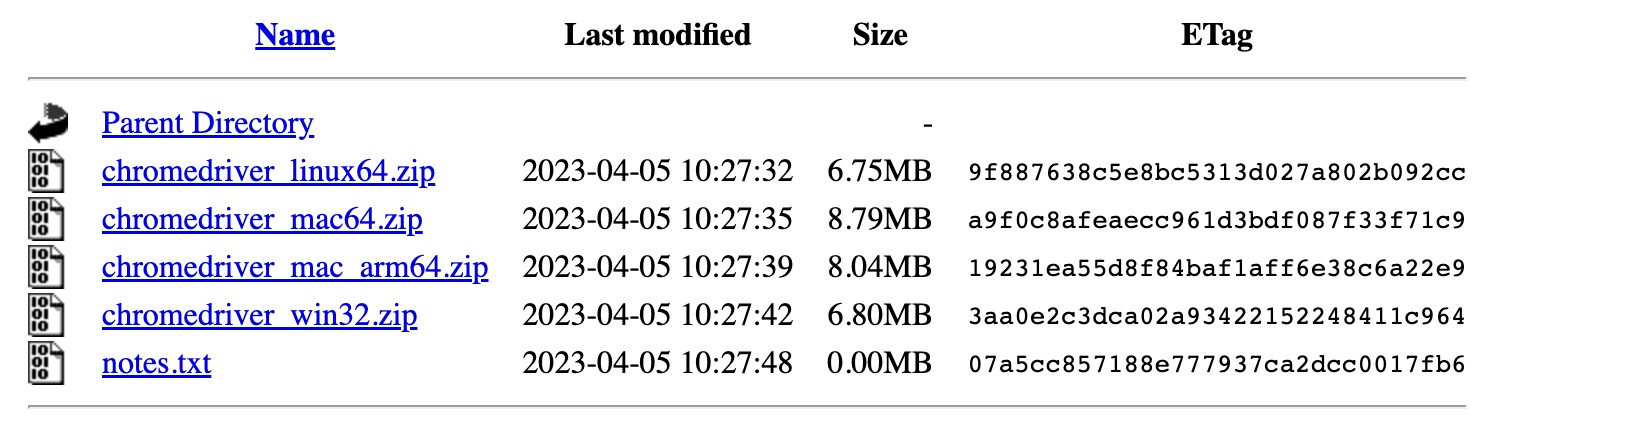

In [9]:
!pip install selenium -q

In [10]:
# !chmod 775 ../chromedriver
!sudo chmod 777 -R ../chromedriver
# !ls ..

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options as ChromeOptions
from selenium.webdriver.common.by import By
import pandas as pd
from tqdm import tqdm

In [7]:
# !sudo apt-get install -y chromium-browser -q
# !sudo pip install chromedriver-py -q
!chmod +x ../chromedriver
# ./chromedriver

In [ ]:
chrome_options = ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
# chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("--remote-debugging-port=9222")

driver = webdriver.Chrome('../chromedriver', options=chrome_options)

In [ ]:
chrome_options

In [ ]:
def translate_text(text):
    time.sleep(0.2)
    driver.get(f"https://www.m-translate.ru/translator/text#text=test&direction=ru-en")

    driver.find_element(By.ID, "text").clear()
    driver.find_element(By.ID, "text").send_keys(text)
    driver.find_element(By.ID, "go_btn").click()
    while driver.find_element(By.ID, "text_out").get_attribute("value") == "":
        time.sleep(0.2)
    return driver.find_element(By.ID, "text_out").get_attribute("value")

In [ ]:
text = "Рады приветствовать тебя на курсе по соревновательному анализу данных!"
translate_text(text)

<div class="alert alert-info">
Парсинг данных - это очень сильный инструмент, который дает вам большое конкурентное преимущество по сравнению с теми, кто его не освоил или не использует. Ведь данные в задачах Data Science играют ключевую роль.